# Tasks: Create cleaned dataset
### 1. Find correlated attributes
### 2. Delete uncorrelated attributes 
### 3. Nomalized correlated attributes
### 4. Created a new cleaned dataset


# 1. Import necessary libraries

In [1]:
##libraies loading###
import os
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
import numpy as np
import theano.tensor as tt
import pymc3 as pm
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('notebook')
plt.style.use('seaborn-darkgrid')
print('Running on PyMC3 v{}'.format(pm.__version__))

ModuleNotFoundError: No module named 'theano'

# 2. Load dataset

In [4]:
###data importing ###
local_data_dir = os.path.join(os.getcwd())
#local_cached_datafile = os.path.join(local_data_dir, 'train_V2.csv')
local_cached_datafile = os.path.join(local_data_dir, './data/Airbnb_Listings.csv')
local_cached_datafile
airbnb_feature = pd.read_csv(local_cached_datafile).copy()


airbnb_feature.head(3)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4952,https://www.airbnb.com/rooms/4952,20200530151957,2020-05-30,Butterfly Inn - Graceful Living !,Lovely garden setting in a serene and art-fill...,Very comfortable Queen bed and small desk in b...,Lovely garden setting in a serene and art-fill...,none,"Located in Professorville, Palo Alto, one of t...",...,f,f,moderate,f,f,5,0,5,0,0.57
1,11464,https://www.airbnb.com/rooms/11464,20200530151957,2020-05-31,Deluxe Private Studio-custom int.,Custom built Studio with exquisite design. Rea...,Description A favorite for international corpo...,Custom built Studio with exquisite design. Rea...,none,10 min. to Lucky's and Starbucks at El Camino ...,...,f,f,moderate,f,t,12,12,0,0,0.08
2,17884,https://www.airbnb.com/rooms/17884,20200530151957,2020-05-31,Silicon Valley Suite,"A guest suite for one or two, in a house in a ...",This is a private suite at the rear of a house...,"A guest suite for one or two, in a house in a ...",none,"This is a very quiet family neighborhood, but ...",...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.11


# Find correlations

C:\Users\trial\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  # This is added back by InteractiveShellApp.init_path()


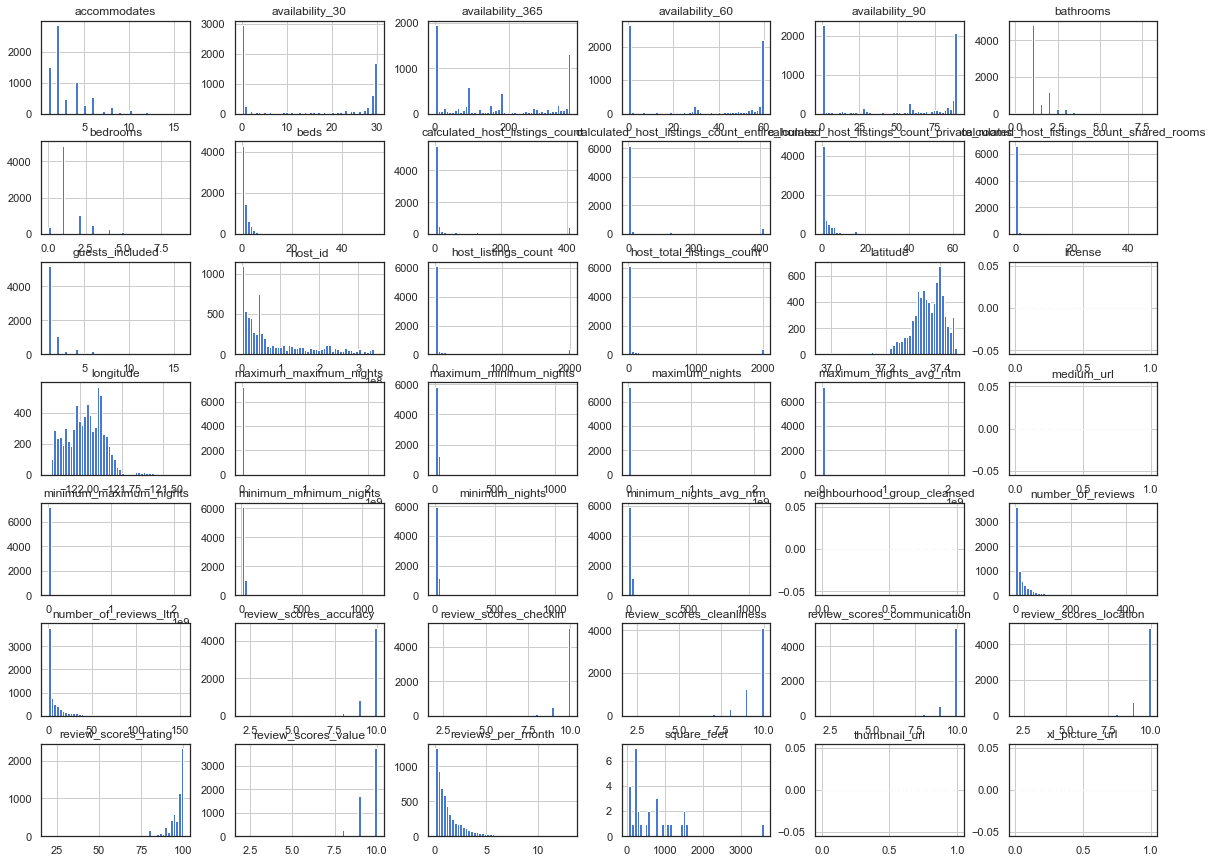

In [6]:
###pairplot##
sns.set(color_codes=True)
sns.set(style="white", palette="muted")
df = airbnb_feature.drop('id',axis = 1)
df = df.drop('listing_url',axis = 1)
df = df.drop('scrape_id',axis = 1)
fig = plt.figure(figsize = [20,15])
ax = fig.gca()
df.hist(ax = ax, bins = 50)
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7221 entries, 0 to 7220
Columns: 103 entries, last_scraped to reviews_per_month
dtypes: float64(23), int64(19), object(61)
memory usage: 5.7+ MB


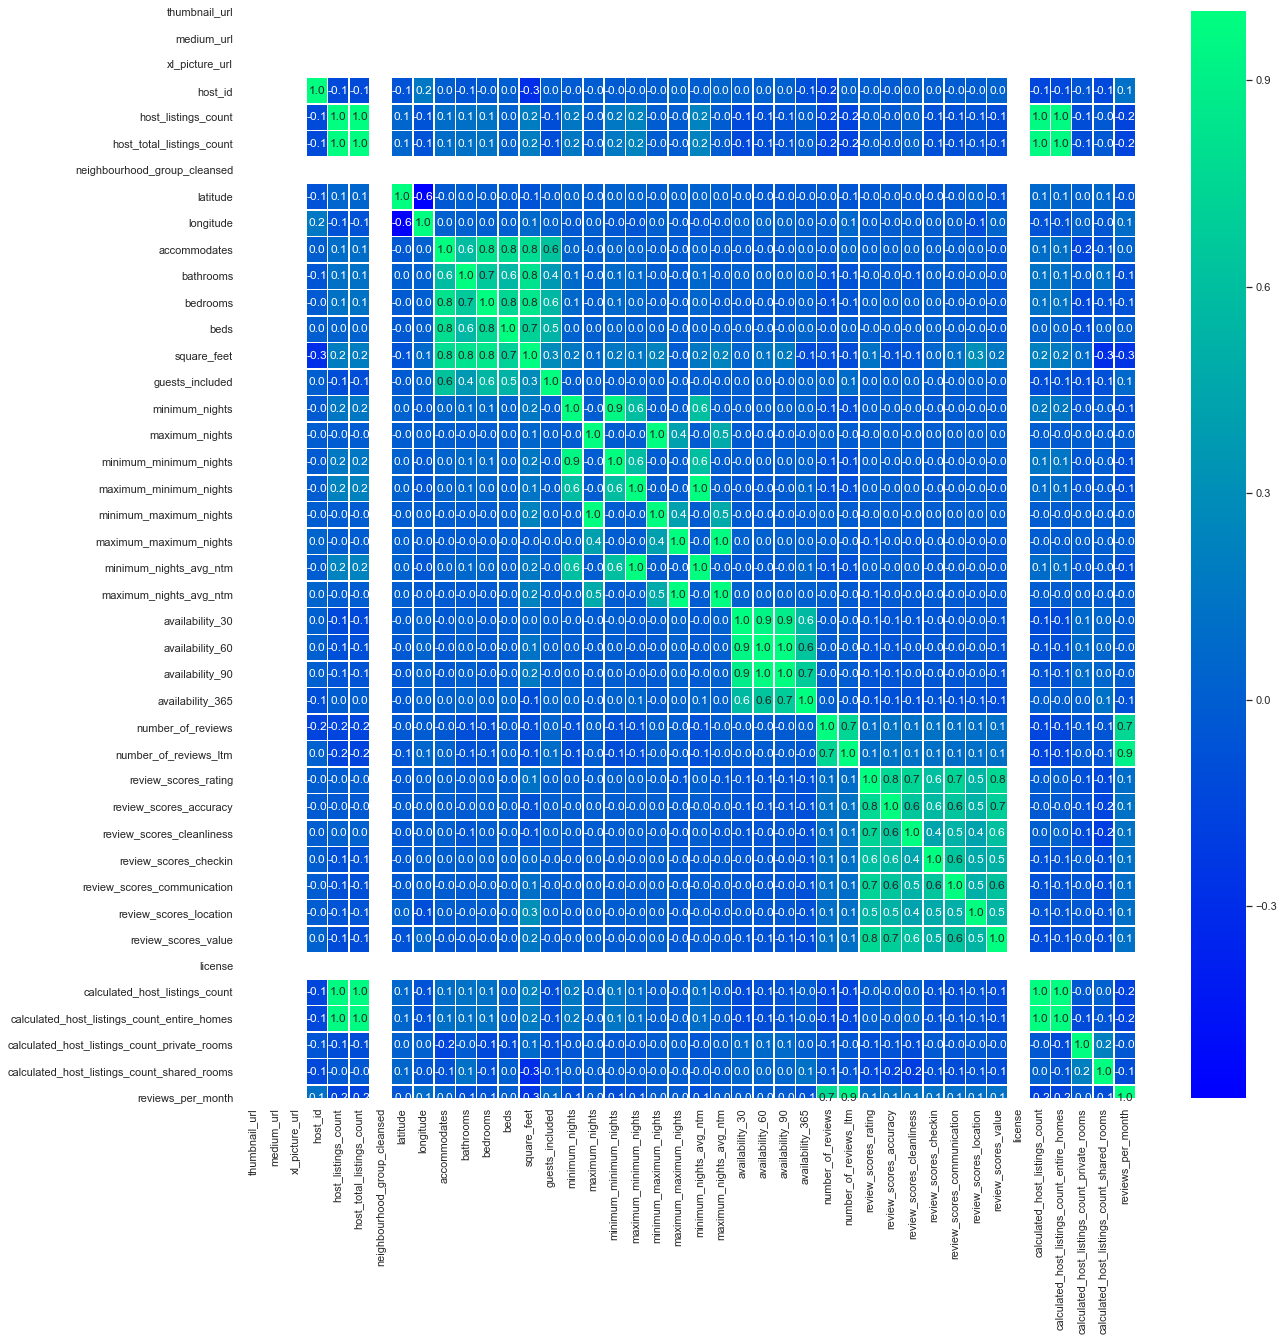

In [8]:
f,ax = plt.subplots(figsize= (20,20))
sns.heatmap(df.corr(), annot = True, linewidths=0.5, fmt = '.1f', ax=ax, cmap = 'winter')
plt.show()